<a href="https://colab.research.google.com/github/vijishmadhavan/testrepo/blob/master/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install requirements
%%capture
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset & Unzip

In [2]:
%%capture
! kaggle datasets download nikhilpandey360/chest-xray-masks-and-labels
! unzip 'chest-xray-masks-and-labels.zip' -d 'chest-xray-masks-and-labels'

In [51]:
# import OS module
import os
 
# Get the list of all files and directories
path1 = "/content/chest-xray-masks-and-labels/Lung Segmentation/masks"
path2 = "/content/chest-xray-masks-and-labels/Lung Segmentation/CXR_png"
cxr = os.listdir(path2)
mask = os.listdir(path1)
print('Mask Folder',len(mask))
print('Xray Folder',len(cxr))

Mask Folder 704
Xray Folder 800


Data Cleaning

In [46]:
# rename files in mask folder
for fileName in os.listdir("."):
  os.rename(fileName, fileName.replace("_mask", ""))

In [52]:
# find how many xray's do not have masks
cxr = os.listdir(path2)
mask = os.listdir(path1)
l3 = [x for x in cxr if x not in mask]
len(l3)

96

In [53]:
# move files which donot have masks to another folder
import shutil
    
source_dir = '/content/chest-xray-masks-and-labels/Lung Segmentation/CXR_png'
target_dir = '/content/chest-xray-masks-and-labels/Lung Segmentation/ClinicalReadings'
    
    
for file_name in l3:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [58]:
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [55]:
path = Path('/content/chest-xray-masks-and-labels/Lung Segmentation')

In [56]:
def my_open(self,fn):
  return open_mask(fn, after_open = self.after_open,div=True)

SegmentationLabelList.open = my_open

In [63]:
data = (SegmentationItemList.from_folder(path ='/content/chest-xray-masks-and-labels/Lung Segmentation/CXR_png')
       .split_by_rand_pct(0.2)
       .label_from_func(lambda x : str(x).replace('CXR_png','masks'), classes = [0, 1])
       .transform(get_transforms(), size=256, tfm_y=True)
       .databunch(path = Path('.'), bs= 16)
       .normalize(imagenet_stats))

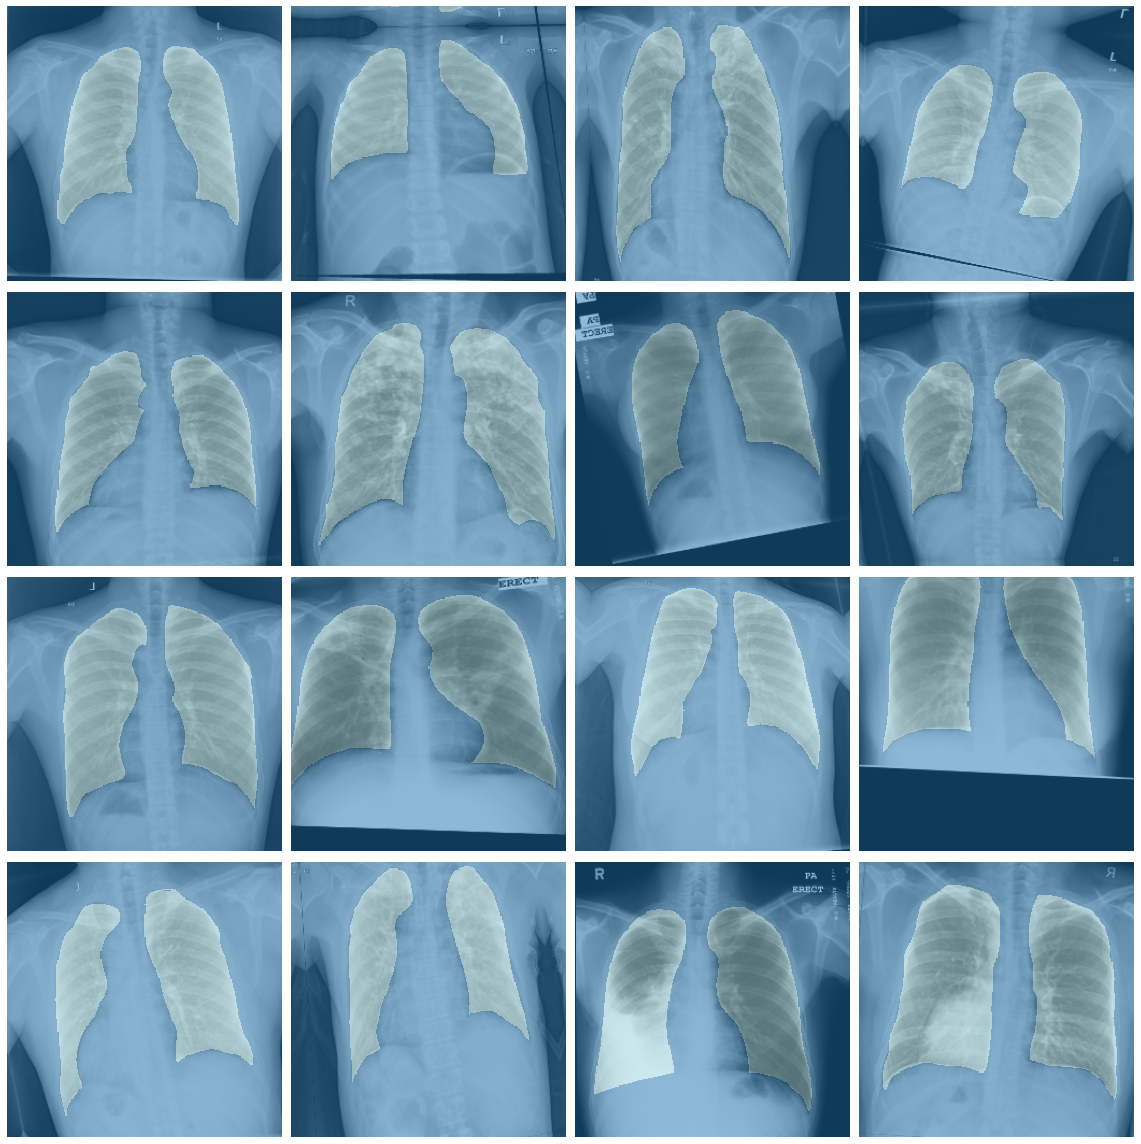

In [64]:
data.show_batch()

In [65]:
learn = unet_learner(data, models.resnet34, metrics = [dice])

Train

In [66]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,dice,time
0,0.841059,0.186199,0.879790,01:00


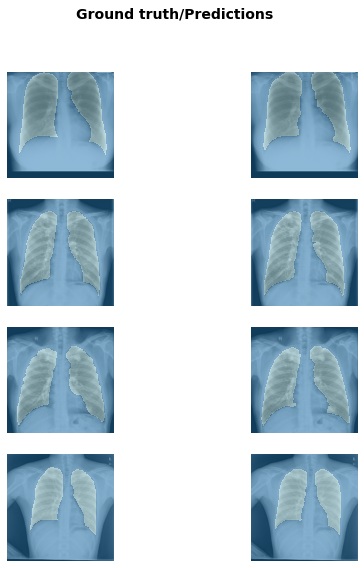

In [ ]:
learn.show_results(rows=4, figsize=(8,9))
